# **HW3**
**Name:** Janga Tushita Sharva  
**Roll Number:** CS21BTECH11022

### **Data Points generation**

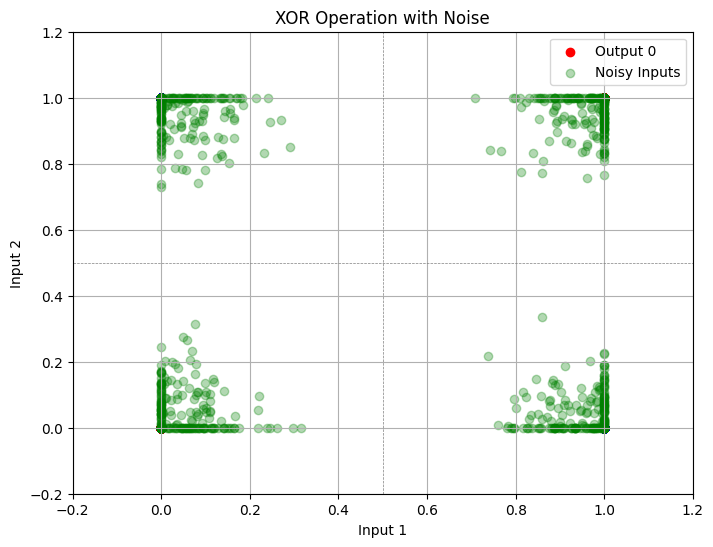

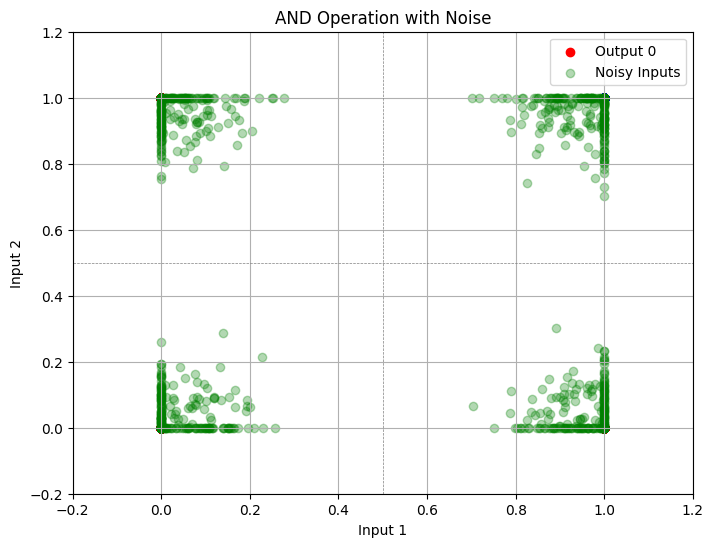

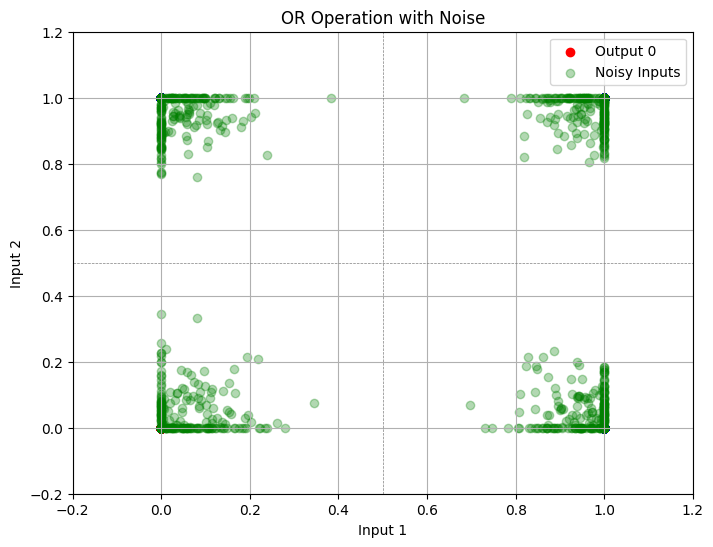

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(operation, n_samples, noise_level=0.1):
    if operation == 'XOR':
        inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        outputs = np.array([[0], [1], [1], [0]])
    elif operation == 'AND':
        inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        outputs = np.array([[0], [0], [0], [1]])
    elif operation == 'OR':
        inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        outputs = np.array([[0], [1], [1], [1]])
    else:
        raise ValueError("Operation must be 'XOR', 'AND', or 'OR'.")

    repeated_inputs = np.tile(inputs, (n_samples // 4, 1))
    repeated_outputs = np.tile(outputs, (n_samples // 4, 1))

    noise = np.random.normal(0, noise_level, repeated_inputs.shape)
    noisy_inputs = repeated_inputs + noise
    noisy_inputs = np.clip(noisy_inputs, 0, 1)
    binary_inputs = (noisy_inputs > 0.5).astype(int)

    return binary_inputs, repeated_outputs, noisy_inputs

def plot_data(operation, inputs, outputs, noisy_inputs):
    plt.figure(figsize=(8, 6))
    
    # Plot original points
    for i in range(len(inputs)):
        if outputs[i] == 1:
            plt.scatter(inputs[i][0], inputs[i][1], color='blue', label='Output 1' if i == 0 else "")
        else:
            plt.scatter(inputs[i][0], inputs[i][1], color='red', label='Output 0' if i == 0 else "")
    
    # Plot noisy points
    plt.scatter(noisy_inputs[:, 0], noisy_inputs[:, 1], color='green', alpha=0.3, label='Noisy Inputs')

    plt.title(f"{operation} Operation with Noise")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.axhline(0.5, color='gray', lw=0.5, ls='--')
    plt.axvline(0.5, color='gray', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
n_samples = 1000
noise_level = 0.1

# Generate datasets for XOR, AND, and OR
for operation in ['XOR', 'AND', 'OR']:
    inputs, outputs, noisy_inputs = generate_dataset(operation, n_samples, noise_level)
    plot_data(operation, inputs, outputs, noisy_inputs)

### **1. Implementing XOR**
Truth table of XOR:
 x1 | x2 | y 
----|----|---
 0  | 0  | 0 
 0  | 1  | 1 
 1  | 0  | 1 
 1  | 1  | 0 